# Logistic regression

### Import libraries and modules

In [1]:
#question1
import math
#part1
import numpy as np
import matplotlib.pyplot as plt
#question2
import pandas as pd
#part2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
#part3
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

### 1. Sigmoid function
#### Write a sigmoid function with three inputs, $\beta_0$, $\beta_1$, and $x$, and $\sigma(\beta_0,\beta_1,x)=\frac{e^{\beta_0+\beta_1x}}{1+e^{\beta_0+\beta_1x}}=\frac{1}{1+e^{-(\beta_0+\beta_1x)}}$

In [2]:
def sigmod(x,y,z):
    return 1/ (1+ math.exp(-((x+y)*z)))
    
print(sigmod(1,2,3))

0.9998766054240137


#### Draw a figure with three sigmoid functions of $\beta_0=\{-1,0,1\}$ and $\beta_1=1$. Briefly explain how do the curves change and how they affect the logistic regression results.

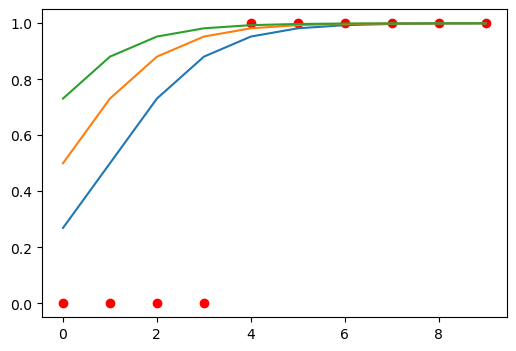

In [3]:
# Define sigmoid function
def sigmod(x, beta_0, beta_1):
    return 1 / (1 + np.exp(-((x + beta_0) * beta_1)))

# Define x values
x = np.arange(10)  # 1D array of 10 values

# Define y values
y_value = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Define beta_0 (intercepts) and beta_1 (slope)
beta_0_v = [-1, 0, 1]  
beta_1 = 1 

# set the figure size
plt.figure(figsize=(6, 4))

# Plot sigmoid curves for different beta_0 values while keeping beta_1 fixed
for beta_0 in beta_0_v:
    Ys = sigmod(x, beta_0, beta_1)
    plt.plot(x, Ys, label=f"beta_0={beta_0}, beta_1={beta_1}")

# Scatter plot for the target y values
plt.scatter(x, y_value, color='red')

# Show the figure
plt.show()



#### Draw a figure with three sigmoid functions of $\beta_0=0$ and $\beta_1=\{0.5,1,2\}$. Briefly explain how do the curves change and how they affect the logistic regression results.

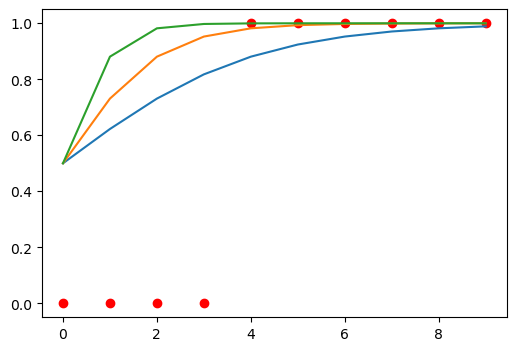

In [4]:
# Define sigmoid function
def sigmod(x, beta_0, beta_1):
    return 1 / (1 + np.exp(-((x + beta_0) * beta_1)))

# Define x values 
x = np.arange(10)  

# Define y values 
y_value = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Define beta_0 (intercepts) and beta_1 (slope)
beta_0_v = [0]  
beta_1_v = [0.5,1,2]  

# set the figure size 
plt.figure(figsize=(6, 4))

# Plot sigmoid curves for all combinations of beta_0 and beta_1 values
for beta_1 in beta_1_v:
    for beta_0 in beta_0_v:  
        Ys = sigmod(x, beta_0, beta_1)  
        plt.plot(x, Ys, label=f"beta_0={beta_0}, beta_1={beta_1}")

# Scatter plot for the target y values
plt.scatter(x, y_value, color='red')

# Show the figure
plt.show()

### 2. Practice with wine data
#### Import the wine qualty data (winequalty-red.csv and winequality-white.csv). Randomly sample 500 wine data for each one and merge as one data. 

In [5]:
#read the datasets
data1 = pd.read_csv('winequality-red.csv', delimiter=';')  
data2 = pd.read_csv('winequality-white.csv', delimiter=';') 

#Select a random sample of 500 form each wine data
sample_1 = data1.sample(n=500, random_state=42)
sample_2 = data2.sample(n=500, random_state=42)

# Merge the two sampled datasets
merged_data = pd.concat([sample_1, sample_2], axis=0)

# Reset index after merging
merged_data.reset_index(drop=True, inplace=True)

# Display the merged data
print(merged_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.7              0.56         0.08            2.50      0.114   
1            7.8              0.50         0.17            1.60      0.082   
2           10.7              0.67         0.22            2.70      0.107   
3            8.5              0.46         0.31            2.25      0.078   
4            6.7              0.46         0.24            1.70      0.077   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 14.0                  46.0   0.9971  3.24       0.66   
1                 21.0                 102.0   0.9960  3.39       0.48   
2                 17.0                  34.0   1.0004  3.28       0.98   
3                 32.0                  58.0   0.9980  3.33       0.54   
4                 18.0                  34.0   0.9948  3.39       0.60   

   alcohol  quality  
0      9.6        6  
1      9.5        5  
2      9.9        6 

#### We want to predict if the wine is white or red. Split the data into 70% train and 30% test sets. Preprocess the data, find the best parameter of a logistic regression model using a pipeline. Report the best parameters and the coefficients of the best model.

In [6]:
data1["type"] = 0  # Red wine
data2["type"] = 1  # White wine

# Combine the data into new dataframe which has "type"
merged_wine_data = pd.concat([data1, data2], axis=0)

# Define X (features) and y (target)
X = merged_wine_data.drop(columns=['type']) 
y = merged_wine_data['type']  

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline with imputation, feature scaling, dimensionality reduction, and Lasso regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Normalize
    ('reduce_dim', PCA()),  # Reduce dimension
    ('regression', Lasso(max_iter=5000))  # Lasso regression 
])

# Define hyperparameter grid for Lasso
param_grid = {
    'reduce_dim__n_components': [2, 5, 10],  # Number of PCA components
    'regression__alpha': [0.001, 0.01, 0.1, 1, 10]  # Regularization strength for Lasso
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error') 

# Train the model with cross-validation
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print(f"Best alpha: {grid_search.best_params_['regression__alpha']}")
print(f"Best RMSE score: {-grid_search.best_score_:.4f}")  # Convert negative MSE to RMSE

# Get the coefficients of the best model
best_regression_model = grid_search.best_estimator_
best_coefficients = best_regression_model.named_steps['regression'].coef_

# Display the coefficients
print("Best Model Coefficients:")
print(best_coefficients)

Best alpha: 0.001
Best RMSE score: 0.0361
Best Model Coefficients:
[ 0.20688629 -0.05134477  0.00056116 -0.04650395 -0.0349962   0.01456582
  0.03215204  0.04542233  0.0765764   0.04672741]


#### Evaluate the model using accuracy, precision, recall, AUC, and ROC curve.

Accuracy: 0.9846
Precision: 0.9876
Recall: 0.9917
AUC: 0.9909


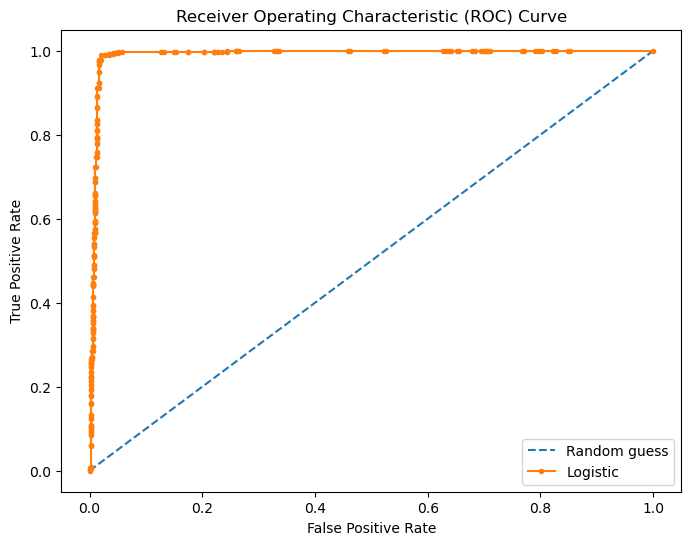

In [7]:
# Ensure the true labels are in integer format
y_test_int = y_test.astype(int)

# Use best regression model from grid search
best_regression_model = grid_search.best_estimator_

# Predict continuous values on the test set
y_pred_continuous = best_regression_model.predict(X_test)

# Convert continuous predictions to binary classes (you can choose your threshold)
y_pred_binary = (y_pred_continuous > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test_int, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

# Precision 
precision = precision_score(y_test_int, y_pred_binary, average='binary')  
print(f"Precision: {precision:.4f}")

# Recall 
recall = recall_score(y_test_int, y_pred_binary, average='binary')  
print(f"Recall: {recall:.4f}")

# AUC 
auc = roc_auc_score(y_test_int, y_pred_continuous)  
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_int, y_pred_continuous) 

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
